## Problem1 编写Buffon投针实验估计$\pi$值的程序

In [3]:
import random
import math

def buffon_needle_experiment(num_trials, needle_length, line_spacing):
    hits = 0
    
    for _ in range(num_trials):
        # 随机生成针的中点位置和角度
        mid_point = random.uniform(0, line_spacing / 2)
        angle = random.uniform(0, math.pi / 2)
        
        # 计算针的末端是否越过线
        if mid_point <= (needle_length / 2) * math.sin(angle):
            hits += 1
    
    # 计算π的估计值
    pi_estimate = (2 * needle_length * num_trials) / (line_spacing * hits)
    return pi_estimate

# 设置实验参数
num_trials = 1000000  # 实验次数
needle_length = 1.0   # 针的长度
line_spacing = 1.0    # 线之间的距离

# 运行实验并估计π的值
pi_estimate = buffon_needle_experiment(num_trials, needle_length, line_spacing)
print(f"Estimated value of π: {pi_estimate}")


Estimated value of π: 3.1417790638126744


## Problem2 编写氢原子电子云的模拟程序

在写代码之前，我们先看看氢原子电子云是怎么一回事。

对于氢原子，球坐标系下的Schrodinger方程为
$$-\frac{\hbar^2}{2\mu r^2}\{\frac{\partial}{\partial r}(r^2\frac{\partial}{\partial r})+\frac{1}{\sin^2\theta}[\sin\theta\frac{\partial}{\partial\theta}(\sin\theta\frac{\partial}{\partial\theta}+\frac{\partial^2}{\partial\phi^2})]\}\Psi-\frac{e^2}{r\pi\epsilon_0r}=E\Psi $$
其分离变量解为
$$\Psi(r,\theta,\phi)=R_{nl}(r)Y_{lm}(\theta,\phi)$$
其中$Y_{lm}$是球谐函数，在scipy里面有定义，而$R_{nl}$用拉盖尔多项式展开（该多项式在scipy有定义）
$$R_{nl}=\sqrt{(\frac{2}{na})^3\frac{(n-l-1)!}{2n[(n+l)!]^3}}e^{-r/{na}}(\frac{2r}{na})^l\cdot L_{n-l-1}^{2l+1}(\frac{2r}{na})$$
其中$a=0.53\times10^{-10}m$，$L_{n-l-1}^{2l+1}$在scipy库中有，声明在以下问题中，全部以$10^{-10}m$归一后的单位和数值进行求解，这对于问题本身没有影响


调用assoc_laguerre

In [5]:
import numpy as np
import scipy.special as ss
def hydrogen(n,l,m,r,th,phi):
    na = 0.53*n
    tmp = (2/na)**3
    tmp *= ss.factorial(n-l-1)
    tmp /= 2*n*ss.factorial(n+l)**3
    tmp2 = np.exp(-r/na) * (2*r/na)**l
    laguerre = ss.assoc_laguerre(2*r/na, n-l-1, 2*l+1)
    R_nl = np.sqrt(tmp)*tmp2*laguerre
    return R_nl*ss.sph_harm(m,l,th,phi)


接下来生成一个主量子数为1，角量子数、磁量子数皆为0的电子云，由于在随机生成坐标点时，越是靠近原点，坐标点越密集，所以通过距离调整概率

In [6]:
from itertools import product
rs = np.arange(50)/50
ths = np.arange(0, np.pi*2, 0.1)
phis = np.arange(0, np.pi, 0.1)

pts = []
for axis in product(rs, ths,phis):
    p = hydrogen(1,0,0,*axis)**2
    if p*axis[0]**2 > np.random.rand()/2:
        pts.append(axis)


绘图

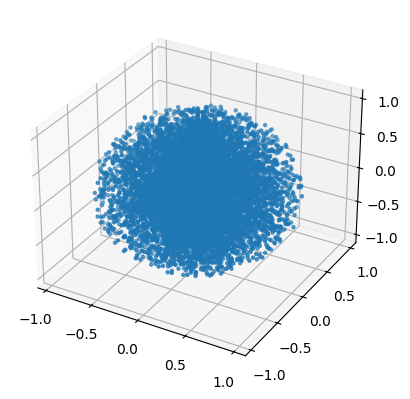

In [7]:
import matplotlib.pyplot as plt
def pts2xyz(pts):
    r, th, phi = zip(*pts)
    x = r*np.sin(phi)*np.cos(th)
    y = r*np.sin(phi)*np.sin(th)
    z = r*np.cos(phi)
    return x,y,z

x,y,z = pts2xyz(pts)
ax = plt.subplot(projection='3d')
ax.scatter(x, y, z, marker='.')
plt.show()


随着半径的增加，电子出现的概率越来越小

考虑到能级越高越不稳定，即出现的概率越低，所以对随机数的量级进行调整。又考虑到等间隔生成坐标点，过于刻意，所以随机生成坐标点（考虑${}^2P_{1}$能级）

4039


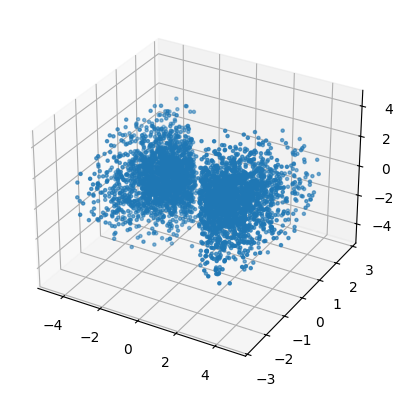

In [8]:
from numpy.random import rand

def getPts(n, l, m, N, rMax, randMax):
    r = rand(N)*rMax
    th = rand(N)*np.pi*2
    phi = rand(N)*np.pi
    pts = []
    for axis in zip(r,th,phi):
        p = hydrogen(n, l, m,*axis)**2
        if p*axis[0]**2 > np.random.rand()*randMax:
            pts.append(axis)
    print(len(pts))
    return pts

pts = getPts(2, 1, 1, 200000, 5, 1/200)
x,y,z = pts2xyz(pts)
ax = plt.subplot(projection='3d')
ax.scatter(x, y, z, marker='.')
plt.show()


哑铃型！

考虑更高的能级，主量子数、角量子数、磁量子数为3、2、2的态的电子云

1607


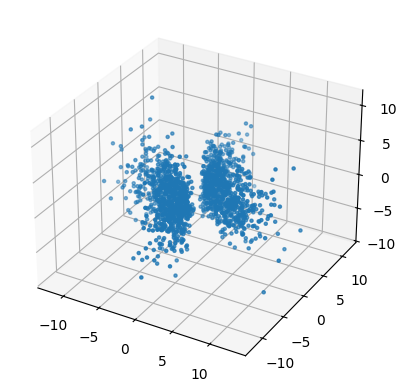

In [9]:
pts = getPts(3, 2, 2, 200000, 15, 1/1e5)
x,y,z = pts2xyz(pts)
ax = plt.subplot(projection='3d')
ax.scatter(x, y, z, marker='.')
plt.show()

现在，为了说明代码的任意性，我们取主量子数为3，角量子数为2，其中所有电子云都画出来如下

5318
962
959
697
677


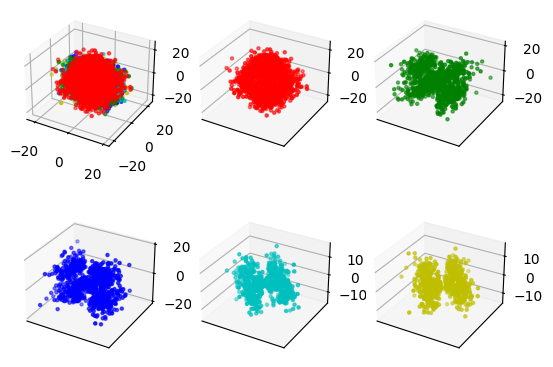

In [10]:
fig = plt.figure()
ax0 = fig.add_subplot(231,projection='3d')

ms = [0,-1,1,-2,2]
cs = ['r', 'g', 'b', 'c', 'y']
for i in range(5):
    ax = fig.add_subplot(2,3,i+2,projection='3d')
    pts = getPts(4, 2, ms[i], 50000, 25, 1/1e7)
    x,y,z = pts2xyz(pts)
    ax0.scatter(x, y, z, marker='.', c=cs[i])
    ax.scatter(x, y, z, marker='.', c=cs[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


当然，你可以自己调整主量子数和角量子数的数值，但是要注意的是，这需要你把$m_s$给弄正确，不然与量子力学相悖

## Problem3 辅助函数计算积分

In [12]:
import numpy as np

# 第一步：生成随机样本
N = 1_000_000
U = np.random.uniform(0, 1, N)
X = U**2

# 第二步：估计积分
f_X = 2 / (np.exp(X) + 1)
integral_estimate = np.mean(f_X)

# 第三步：估计统计误差
f_X2 = f_X**2
var_f = np.mean(f_X2) - np.mean(f_X)**2
error_estimate = np.sqrt(var_f / N)

# 输出结果
print(f"积分估计值: {integral_estimate}")
print(f"统计误差: {error_estimate}")

积分估计值: 0.8389897538891282
统计误差: 0.00014085428873853787


## Problem4 编写链式反应模拟的程序

## 我的答案（简单）

In [11]:
import numpy as np

def simulate_chain_reaction(N0, M, S, nu, p):
    #初始参数
    # N0:初始中子数
    # M:铀块的质量
    # S:铀矿块边长比(S = a/b)
    # nu:每次裂变产生的中子数
    # p:中子捕获概率

    # 生成随机值
    r = np.random.random((3, N0))
    phi = np.random.random((2, N0)) * 2 * np.pi
    costheta = np.random.random((2, N0)) * 2 - 1
    d = np.random.random((2, N0))

    # 计算铀块的尺寸
    a = (M * S) ** (1 / 3)
    b = (M / S / S) ** (1 / 3)

    N_fission = 0  # 显示裂变事件数目的计数器

    # 循环穿过每个初始中子
    for k in range(N0):
        x0 = a * r[0, k]
        y0 = a * r[1, k]
        z0 = b * r[2, k]

        sintheta = np.sqrt(1 - costheta**2)

        # 裂变中子1的最终位置
        x1 = x0 + d[0, k] * sintheta[0, k] * np.cos(phi[0, k])
        y1 = y0 + d[0, k] * sintheta[0, k] * np.sin(phi[0, k])
        z1 = z0 + d[0, k] * costheta[0, k]

        # 裂变中子2的最终位置
        x2 = x0 + d[1, k] * sintheta[1, k] * np.cos(phi[1, k])
        y2 = y0 + d[1, k] * sintheta[1, k] * np.sin(phi[1, k])
        z2 = z0 + d[1, k] * costheta[1, k]

        # 检查1号中子是否在铀块的范围内
        if 0 <= x1 <= a and 0 <= y1 <= a and 0 <= z1 <= b:
            if np.random.random() > p:  # 检查是否未捕获
                N_fission += 1

        # 检查2号中子是否在铀块的范围内
        if 0 <= x2 <= a and 0 <= y2 <= a and 0 <= z2 <= b:
            if np.random.random() > p:  # 检查是否未捕获
                N_fission += 1

    # 计算增值系数
    k = N_fission * nu / N0
    return k

# 参数设定
N0 = 1000  # 初始中子数
M = 40  # 铀块的质量
S = 3  # 铀块的边长比
nu = 2.5  # 每次裂变产生的平均中子数
p = 0.2  # 中子捕获概率

# RUN
k = simulate_chain_reaction(N0, M, S, nu, p)
print('Multiplication factor (k):', k)


Multiplication factor (k): 2.96


## 我的答案（复杂）

放射性物质的链式反应是一个随机过程，借助M-C方法模拟研究链式反应，计算其的倍增系数k以及临界质量M

本题目计算的模型是一个长方体U核，尺寸为$a\times a\times b$，裂变U核位置随机

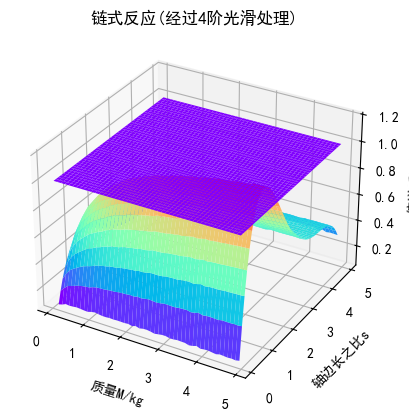

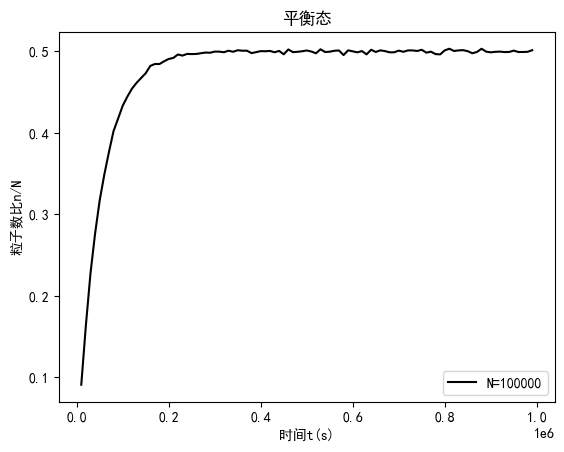

In [1]:
#链式反应
import numpy as np
import random as rd
import math as ma
from matplotlib import pyplot as plt
from scipy import signal
def f(m,s1,N0):
    N=0
    a=(m*s1)**(1/3);b=(m*(s1**(-2)))**(1/3)
    for p in range(N0):
        r=[]
        for i in range(9):
            r.append(rd.random())
        x0=a*(r[0]-0.5);y0=a*(r[1]-0.5);z0=b*(r[2]-0.5)
        dr1=2*ma.pi*r[3];theta1=ma.acos(2*r[4]-1);dr2=2*ma.pi*r[5];theta2=ma.acos(2*r[6]-1)
        d1=r[7];d2=r[8]
        x1=x0+d1*ma.sin(theta1)*ma.cos(dr1)
        y1=y0+d1*ma.sin(theta1)*ma.cos(dr1)
        z1=z0+d1*ma.cos(theta1)
        x2=x0+d2*ma.sin(theta2)*ma.cos(dr2)
        y2=y0+d2*ma.sin(theta2)*ma.cos(dr2)
        z2=z0+d2*ma.cos(theta2)
        if -0.5*a<=x1<=0.5*a and -0.5*b<=y1<=0.5*b and -0.5*a<=z1<=0.5*a:
            N=N+1
        if -0.5*a<=x2<=0.5*a and -0.5*b<=y2<=0.5*b and -0.5*a<=z2<=0.5*a:
            N=N+1
    k=N/N0
    return k
m=[];s1=[];c1=[];p=50;K=50
for jo in range(1,p):
    for ji in range(1,K):
        m.append(jo*0.1)
        s1.append(ji*0.1)
        t1=m[ji-1+(jo-1)*(p-1)];t2=s1[ji-1]
        c1.append(f(t1,t2,10**4))
m=np.array([m])
m=m.reshape(-1,p-1)
s1=np.array([s1])
s1=s1.reshape(-1,p-1)
c1=np.array([c1])
c1=c1.reshape(-1,p-1)
df=0
if type(len(c1)/2)!=type(1):
    df=len(c1)-4
if type(len(c1)/2)==type(1):
    df=len(c1)-3
c1=signal.savgol_filter(c1,df,4)
d3=plt.axes(projection='3d')
v1=np.ones(c1.shape)
d3.plot_surface(m,s1,v1,cmap='rainbow')
d3.plot_surface(m,s1,c1,cmap='rainbow')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
d3.set_zlabel('倍增系数k')
d3.set_xlabel('质量M/kg')
d3.set_ylabel('轴边长之比s')
d3.set_title('链式反应(经过4阶光滑处理)')
plt.show()	
#平衡态
import random as rd
from matplotlib import pyplot as plt
def f(M):
    t1=[];N=100000;B=0
    for i in range(N):
        t1.append(1)
    for j in range(M):
        r=rd.random()
        k=int(r*N)
        t1[k]=-t1[k]
        B=B-t1[k]
    F=B/N
    return F
x1=[];x2=[]
for op in range(1,100):
    x1.append(f(op*10**4))
    x2.append(op*10**4)
plt.plot(x2,x1,c='k',label='N=100000')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('时间t(s)')
plt.ylabel('粒子数比n/N')
plt.title('平衡态')
plt.legend()
plt.show()

插一句，在GitHub上微软弄了个链式反应的模拟，看上去挺牛的，链接https://github.com/microsoft/chain-reaction